In [2]:
from keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import cv2
import os

In [2]:
# from os.path import dirname, join,__file__
prototxtPath = 'deploy.prototxt.txt'
weightsPath= 'res10_300x300_ssd_iter_140000.caffemodel'

In [3]:
prototxtPath

'deploy.prototxt.txt'

In [4]:
net=cv2.dnn.readNet(weightsPath,prototxtPath)

In [5]:
net

< cv2.dnn.Net 000001B623597110>

In [6]:
## Load model
model=load_model('model/custom_4370_32_100_v2.h5')

In [9]:
dataset = "test"
imagePaths=list(paths.list_images(dataset))
data=[]

for i in imagePaths:
    data.append(i)


In [16]:
image=cv2.imread("demo-images/man2-with-mask.jpg")

In [17]:
image.shape

(1300, 1300, 3)

In [18]:
(h,w)=image.shape[:2]

In [19]:
blob=cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))
blob.shape
net.setInput(blob)
detections = net.forward()

In [20]:
detections

array([[[[0.        , 1.        , 0.97125816, ..., 0.14085567,
          0.64415175, 0.65915006],
         [0.        , 1.        , 0.18163441, ..., 0.28372124,
          0.5298525 , 0.38257638],
         [0.        , 1.        , 0.16379808, ..., 0.2960015 ,
          0.32413527, 0.43188012],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

CONF:  0.97125816
1/1 [==============================] - 0s 16ms/step
MASK:  1.0
Without:  1.3508881e-15
CONF:  0.18163441
CONF:  0.16379808
CONF:  0.12259977
CONF:  0.116230845
CONF:  0.10998431
CONF:  0.1042348
CONF:  0.09991908
CONF:  0.08980896
CONF:  0.08966631
CONF:  0.089606434
CONF:  0.08785465
CONF:  0.08705438
CONF:  0.08569483
CONF:  0.0853243
CONF:  0.084630065
CONF:  0.083434686
CONF:  0.083167635
CONF:  0.08311546
CONF:  0.082865015
CONF:  0.082327515
CONF:  0.08209757
CONF:  0.08202485
CONF:  0.08089918
CONF:  0.07984017
CONF:  0.079605296
CONF:  0.07922296
CONF:  0.07914688
CONF:  0.07815224
CONF:  0.07812696
CONF:  0.077976964
CONF:  0.07796858
CONF:  0.077410854
CONF:  0.0772961
CONF:  0.076905735
CONF:  0.07669391
CONF:  0.07663225
CONF:  0.076398134
CONF:  0.07620928
CONF:  0.07618642
CONF:  0.075830735
CONF:  0.07579317
CONF:  0.0756618
CONF:  0.07554829
CONF:  0.07504521
CONF:  0.07443485
CONF:  0.07439119
CONF:  0.074305475
CONF:  0.07384741
CONF:  0.073840395
CO

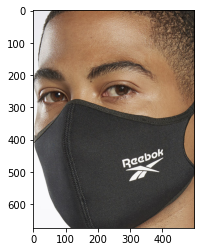

In [21]:
#loop over the detections
det =[]
a=0
for i in range(0,detections.shape[2]):
    confidence=detections[0,0,i,2]
    print("CONF: ",confidence)
    if confidence>0.3:
        box=detections[0,0,i,3:7]*np.array([w,h,w,h])
        (startX,startY,endX,endY)=box.astype('int')
        (startX,startY)=(max(0,startX),max(0,startY))
        (endX,endY)=(min(w-1,endX), min(h-1,endY))
        face=image[startY:endY, startX:endX]
        face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
        plt.imshow(face)
        face=cv2.resize(face,(96,96))
        det.append(face)
        face=img_to_array(face)
        face=preprocess_input(face)
        face=np.expand_dims(face,axis=0)
        
        (withoutMask,mask)=model.predict(face)[0]
        print("MASK: ",mask)
        print("Without: ",withoutMask)
        #determine the class label and color we will use to draw the bounding box and text
        label='Mask' if mask>withoutMask else 'No Mask'
        color=(0,255,0) if label=='Mask' else (255,0,0)
        #include the probability in the label
        label="{}: {:.2f}%".format(label,max(mask,withoutMask)*100)
        
        #display the label and bounding boxes
        cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
        cv2.rectangle(image,(startX,startY),(endX,endY),color,2)   
        a=a+1
# plt.imshow(det[1])
    

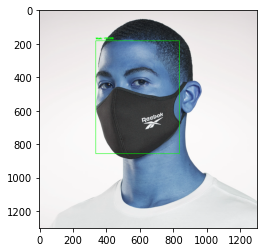

In [22]:
plt.imshow(image)